# One-way Analysis of Variance (ANOVA)
## Author: Snigdhayan Mahanta

Consider 2 or more groups of sample data. The ANOVA tests the null hypothesis that the samples in all groups are drawn from populations with identical means. It can be used to ascertain whether the averages of the incomes of the populations in 3 different cities are identical. I have provided a simple illustration of this test using dummy data below.

In [1]:
# Data parameters of 3 normally distributed datasets - sample size, mean and standard deviation
size <- 1000

mean1 <- 60000
mean2 <- 75000 
mean3 <- 90000

sd1 <- 20000
sd2 <- 20000
sd3 <- 20000

In [2]:
# Create sample dataframe with specified parameters
data1 <- rnorm(size, mean1, sd1)
data2 <- rnorm(size, mean2, sd2)
data3 <- rnorm(size, mean3, sd3)

df <- data.frame("Group_1" = data1, "Group_2" = data2, "Group_3" = data3)

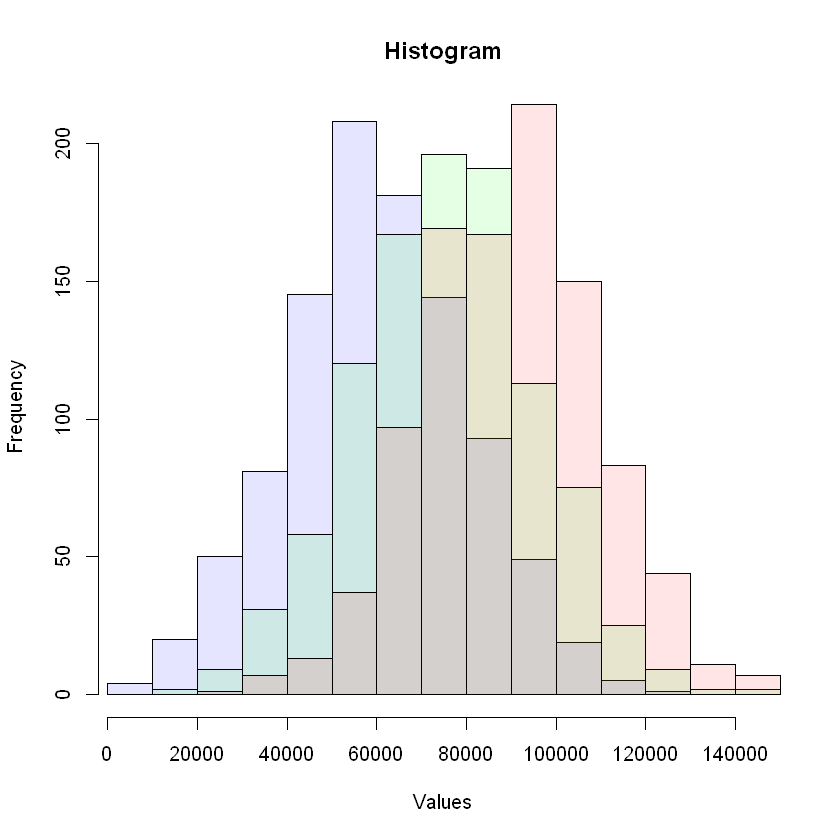

In [3]:
# Visualize the data
lower <- min(df)
upper <- max(df)

Histogram1 <- hist(df$Group_1, plot = FALSE)
Histogram2 <- hist(df$Group_2, plot = FALSE)
Histogram3 <- hist(df$Group_3, plot = FALSE)

plot(Histogram1, col = rgb(0, 0, 1, 1/10), xlab = "Values", main = "Histogram", xlim = c(lower, upper)) 
plot(Histogram2, col = rgb(0, 1, 0, 1/10), xlab = "Values", main = "Histogram", xlim = c(lower, upper), add = TRUE) 
plot(Histogram3, col = rgb(1, 0, 0, 1/10), xlab = "Values", main = "Histogram", xlim = c(lower, upper), add = TRUE) 

In [4]:
# Prepare data for analysis of variance (ANOVA)
df_stack <- data.frame(stack(df[1:ncol(df)]))
names(df_stack)[names(df_stack) == "values"] <- "Value"
names(df_stack)[names(df_stack) == "ind"] <- "Group"

In [5]:
# Check if the variance within individual groups are comparable
flignerTest <- fligner.test(Value ~ Group, data = df_stack)
flignerTest # if the 'p-value' exceeds significance level, then the variances are comparable


	Fligner-Killeen test of homogeneity of variances

data:  Value by Group
Fligner-Killeen:med chi-squared = 0.94273, df = 2, p-value = 0.6242


In [6]:
# Compute the analysis of variance (ANOVA)
res.aov <- aov(Value ~ Group, data = df_stack)
# Summary of the analysis
summaryAnova <- summary(res.aov)
summaryAnova # if 'Pr(>F)' falls below the significance level, then reject the null hypothesis

              Df    Sum Sq   Mean Sq F value Pr(>F)    
Group          2 4.306e+11 2.153e+11     542 <2e-16 ***
Residuals   2997 1.191e+12 3.973e+08                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [7]:
# Tukey test to differentiate the means if null hypothesis is rejected
TukeyTest <- TukeyHSD(res.aov)
TukeyTest # ascertain the significance of the differences between the observed means

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Value ~ Group, data = df_stack)

$Group
                    diff      lwr      upr p adj
Group_2-Group_1 15239.60 13149.50 17329.69     0
Group_3-Group_1 29338.91 27248.81 31429.01     0
Group_3-Group_2 14099.31 12009.22 16189.41     0


One can now repeat the test by changing the values of the data parameters, i.e., sample size, mean and standard deviation.